In [1]:
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt

In [2]:
# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

training_params = np.arange(80,121,5)
print("nt={}".format(nt))
print("training parameters={}".format(training_params))

file_name_SVD="./diffusion_model/ex16_SVD.p"
print(file_name_SVD)

nt=500
training parameters=[ 80  85  90  95 100 105 110 115 120]
./diffusion_model/ex16_SVD.p


In [ ]:
# load snapshot
snapshot = np.array([])
for i in training_params:
    ex = np.load('./diffusion_data/ex16_interp_{}.npz'.format(i), allow_pickle = True)
    ex = ex.f.arr_0
    snapshot = np.append(snapshot, ex)
snapshot = snapshot.reshape(len(training_params)*(nt+1),-1)
print('data shape \t {}'.format(snapshot.shape))
print('data dtype \t {}'.format(snapshot.dtype))

snapshot_u = np.copy(snapshot)

# do svd decomposition
U_u,S_u,V_uT=np.linalg.svd(snapshot_u.T,full_matrices=False)

# save SVD
SVD={'U':U_u,'S':S_u,'VT':V_uT}
with open(file_name_SVD,'wb') as ff:
    pickle.dump(SVD,ff)

# of POD Basis: [3 4 5 6]
./diffusion_result/ex16_POD_3_proj_result.p
accuracy: 99.88972057485799
./diffusion_result/ex16_POD_4_proj_result.p
accuracy: 99.98403628287676
./diffusion_result/ex16_POD_5_proj_result.p
accuracy: 99.99570639745521
./diffusion_result/ex16_POD_6_proj_result.p
accuracy: 99.99814256884227


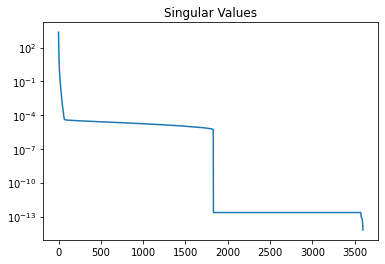

In [3]:
# file path
file_name_SVD="./diffusion_model/ex16_SVD.p"

basis_list=np.array([3,4,5,6])
print("# of POD Basis:",basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]

    # file path
    file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]
    S_u=SVD['S']

    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))
    
plt.figure()
plt.semilogy(S_u)
plt.title("Singular Values")
# plt.show()
plt.savefig("./diffusion_result/ex16_SVD.png")

# Projection error

In [8]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
import time, sys
import pickle

In [7]:
# Given parameters
nx = 60
ny = 60
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
free_multi_index=(multi_index_j[1:-1,1:-1].flatten(),multi_index_i[1:-1,1:-1].flatten())
x0_multi_index=(multi_index_j[1:-1,0].flatten(),multi_index_i[1:-1,0].flatten())
x1_multi_index=(multi_index_j[1:-1,-1].flatten(),multi_index_i[1:-1,-1].flatten())
y0_multi_index=(multi_index_j[0,1:-1].flatten(),multi_index_i[0,1:-1].flatten())
y1_multi_index=(multi_index_j[-1,1:-1].flatten(),multi_index_i[-1,1:-1].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
free_raveled_indicies=np.ravel_multi_index(free_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
x01_raveled_indicies=np.concatenate((x0_raveled_indicies,x1_raveled_indicies))
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
y01_raveled_indicies=np.concatenate((y0_raveled_indicies,y1_raveled_indicies))
fixed_raveled_indicies=np.setdiff1d(full_raveled_indicies,free_raveled_indicies)

# measurements
msmt_idx=full_raveled_indicies

./diffusion_model/ex16_SVD.p
[3 4 5 6]
POD basis: 3
./diffusion_result/ex16_POD_3_proj_result.p


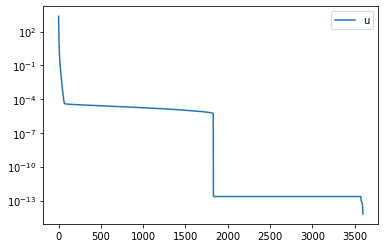

accuracy: 99.88972057485799

Time elapsed: 1.0071656703948975 sec
average relative error of u: 4.844392064660675%

maximum relative error of u: 5.444312309456562%

Time elapsed: 1.0581333637237549 sec
average relative error of u: 5.17922772944775%

maximum relative error of u: 5.925704037445394%

Time elapsed: 1.0390639305114746 sec
average relative error of u: 5.857843956971802%

maximum relative error of u: 6.808125110884224%

Time elapsed: 1.0389904975891113 sec
average relative error of u: 6.99584930320061%

maximum relative error of u: 8.15551367135942%

Time elapsed: 1.058652400970459 sec
average relative error of u: 8.56676125254122%

maximum relative error of u: 9.964072726795775%

Time elapsed: 1.0646193027496338 sec
average relative error of u: 10.43885130930575%

maximum relative error of u: 12.15024960499895%

Time elapsed: 1.1068108081817627 sec
average relative error of u: 12.438918340523614%

maximum relative error of u: 14.55999314241205%

Time elapsed: 1.06122565269470

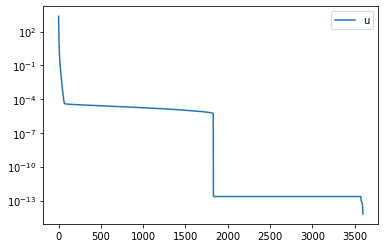

accuracy: 99.98403628287676

Time elapsed: 0.988623857498169 sec
average relative error of u: 4.5268009102915325%

maximum relative error of u: 5.163678821112269%

Time elapsed: 1.078148365020752 sec
average relative error of u: 4.367316275331892%

maximum relative error of u: 4.919692576338413%

Time elapsed: 1.138655424118042 sec
average relative error of u: 4.105395087233971%

maximum relative error of u: 4.541369223937694%

Time elapsed: 1.1271030902862549 sec
average relative error of u: 3.8089624403887785%

maximum relative error of u: 4.103601693770268%

Time elapsed: 1.0965771675109863 sec
average relative error of u: 3.608062695309733%

maximum relative error of u: 3.9087956845638816%

Time elapsed: 1.1270153522491455 sec
average relative error of u: 3.7281775356890887%

maximum relative error of u: 4.169957429339023%

Time elapsed: 1.050647497177124 sec
average relative error of u: 4.439539583403019%

maximum relative error of u: 4.80678800116455%

Time elapsed: 1.08166766166

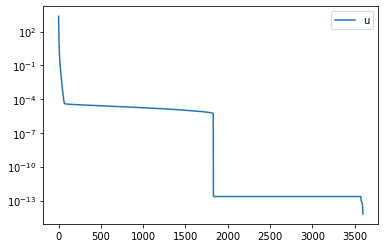

accuracy: 99.99570639745521

Time elapsed: 1.6277799606323242 sec
average relative error of u: 2.1744831468310135%

maximum relative error of u: 2.3957688144222087%

Time elapsed: 1.7242050170898438 sec
average relative error of u: 2.2070812889721267%

maximum relative error of u: 2.4923304528973116%

Time elapsed: 1.6823978424072266 sec
average relative error of u: 2.455823780763978%

maximum relative error of u: 2.8171598540790166%

Time elapsed: 1.7637104988098145 sec
average relative error of u: 2.8798155844052804%

maximum relative error of u: 3.246552375087074%

Time elapsed: 1.7387466430664062 sec
average relative error of u: 3.345261746002586%

maximum relative error of u: 3.720430651841385%

Time elapsed: 1.704948902130127 sec
average relative error of u: 3.7242075283294804%

maximum relative error of u: 4.169778892261588%

Time elapsed: 1.7161242961883545 sec
average relative error of u: 3.986702312026632%

maximum relative error of u: 4.571801126870849%

Time elapsed: 1.7657

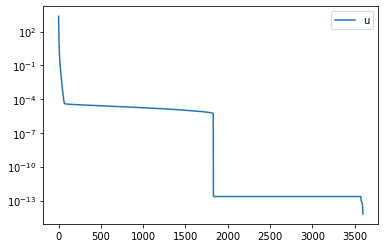

accuracy: 99.99814256884227

Time elapsed: 1.495758056640625 sec
average relative error of u: 1.8127727080835525%

maximum relative error of u: 2.0388293079951554%

Time elapsed: 1.7262482643127441 sec
average relative error of u: 1.5808062538385206%

maximum relative error of u: 1.7611358198526952%

Time elapsed: 1.716702938079834 sec
average relative error of u: 1.5339621908769434%

maximum relative error of u: 1.6973875131721934%

Time elapsed: 1.7426726818084717 sec
average relative error of u: 1.7023161521680954%

maximum relative error of u: 1.7912888108657574%

Time elapsed: 1.6763794422149658 sec
average relative error of u: 1.92146297585199%

maximum relative error of u: 2.1425789279447955%

Time elapsed: 1.704815149307251 sec
average relative error of u: 1.9989563543724869%

maximum relative error of u: 2.306702976411221%

Time elapsed: 1.6718673706054688 sec
average relative error of u: 1.8920058665943125%

maximum relative error of u: 2.1343933256719705%

Time elapsed: 1.69

In [9]:
# file path
file_name_SVD="./diffusion_model/ex16_SVD.p"
print(file_name_SVD)

basis_list=np.array([3,4,5,6])
print(basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]
    print("POD basis: {}".format(POD_basis))
    
    # file path
    file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]

    plt.figure()
    plt.semilogy(S_u)
    plt.legend('u')
    plt.show()
    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    results={'avg_rel_err':[],'rel_err':[],'elapsed_time':[]}

    for FOM_parameter in training_params:
        # Load FOM solution
        ex = np.load('./diffusion_data/ex16_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print()
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))

        # save result
        results['avg_rel_err'].append(u_avg_rel_err)
        results['rel_err'].append(u_rel_err_gappyPOD)
        results['elapsed_time'].append(t_elapsed_gappyPOD)

    results['avg_rel_err']=np.array(results['avg_rel_err'])
    results['rel_err']=np.array(results['rel_err'])
    results['elapsed_time']=np.array(results['elapsed_time'])

    with open(file=file_path_prj_result, mode='wb') as ff:
        pickle.dump(results, ff)

# Plot other cases together

In [3]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=28)  # fontsize of the figure title

linestyle=['solid','dotted','dashed','dashdot']

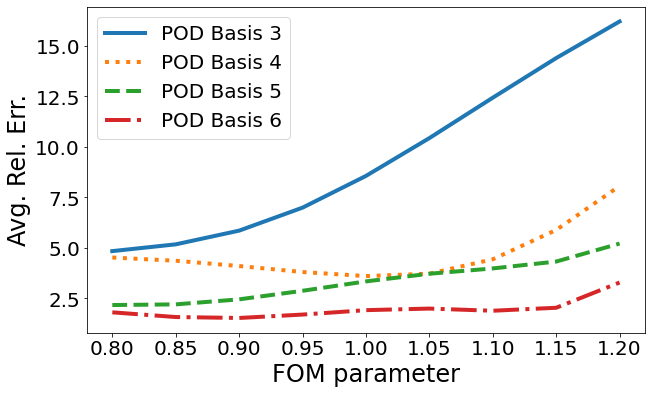

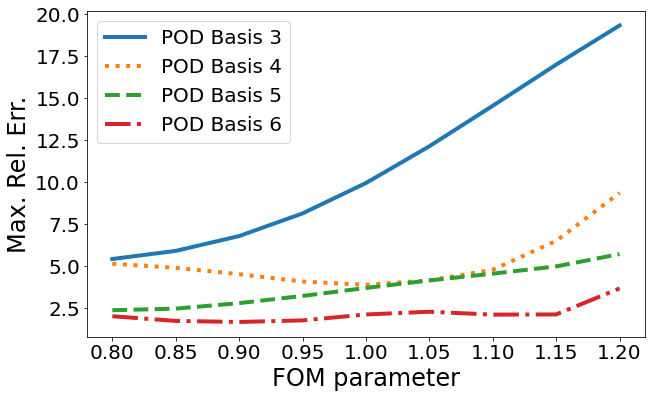

In [4]:
basis_list=np.array([3,4,5,6])

plt.figure(num=1,figsize=(10,6))
plt.figure(num=2,figsize=(10,6))
for i in range(len(basis_list)):
    POD_basis = basis_list[i]
    file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
    with open(file=file_path_prj_result, mode='rb') as ff:
        results=pickle.load(ff)   
    plt.figure(num=1)
    plt.plot(training_params/100,results['avg_rel_err'],linestyle=linestyle[i],linewidth=4)

    plt.figure(num=2)
    plt.plot(training_params/100,results['rel_err'].max(axis=1),linestyle=linestyle[i],linewidth=4)

plt.figure(num=1)    
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./diffusion_result/ex16_POD_proj_avg_rel_err.png")

plt.figure(num=2)
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./diffusion_result/ex16_POD_proj_max_rel_err.png")

In [14]:
print(basis_list)
print(training_params)

[3 4 5 6]
[ 80  85  90  95 100 105 110 115 120]


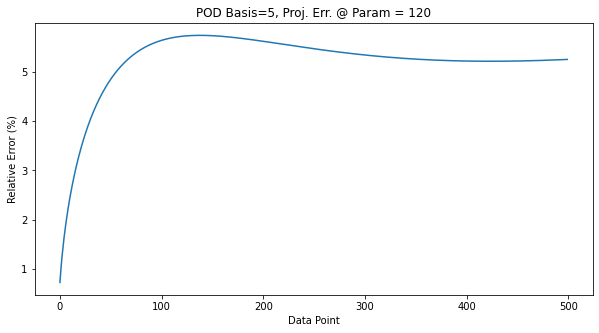

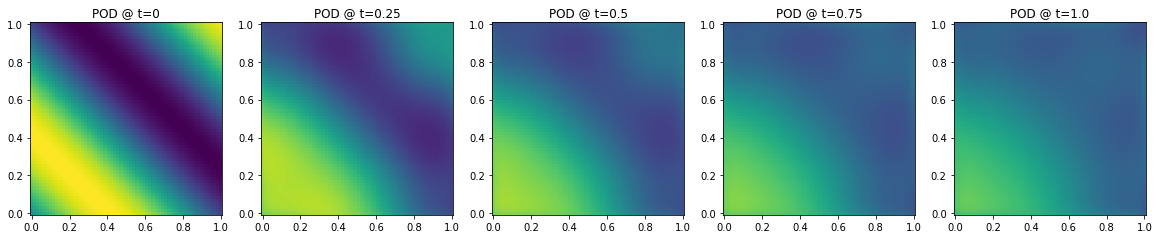

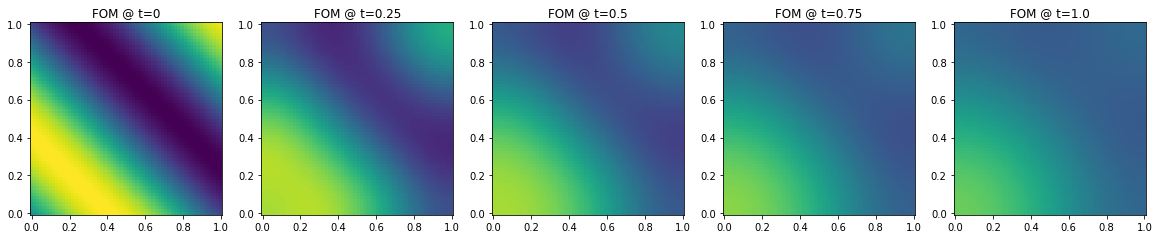

In [15]:
i=2; j=-1        
POD_basis=basis_list[i]
param=training_params[j]

file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
with open(file=file_path_prj_result, mode='rb') as ff:
    results=pickle.load(ff)  

u_rel_err_gappyPOD=results['rel_err'][j,1:]
plt.figure(figsize=(10,5))

plt.plot(u_rel_err_gappyPOD.flatten())
plt.xlabel('Data Point')
plt.ylabel('Relative Error (%)')
plt.title('POD Basis={}, Proj. Err. @ Param = {}'.format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1

# POD
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[0].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t=0')

plt.subplot(1,5,2)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)))

plt.subplot(1,5,3)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*2].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)*2))

plt.subplot(1,5,4)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*3].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)*3))

plt.subplot(1,5,5)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[nt].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*nt))

plt.show()

# FOM
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[0].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t=0')

plt.subplot(1,5,2)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)))

plt.subplot(1,5,3)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*2].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)*2))

plt.subplot(1,5,4)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*3].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)*3))

plt.subplot(1,5,5)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[nt].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*nt))

plt.show()